# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

### Importing the dataset

In [2]:
dataset = pd.read_excel('RPDataset1.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explosive type                588 non-null    object 
 1   Explosive mass(kg)            588 non-null    float64
 2   Standoff distance(m)          588 non-null    float64
 3   Peak reflected pressure(kPa)  588 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.5+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explosive mass(kg)            588 non-null    float64
 1   Standoff distance(m)          588 non-null    float64
 2   Peak reflected pressure(kPa)  588 non-null    float64
 3   Explosive type_Composition B  588 non-null    uint8  
 4   Explosive type_TNT            588 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 15.1 KB


In [4]:
y = dataset[('Peak reflected pressure(kPa)')]
X = dataset.drop('Peak reflected pressure(kPa)', axis=1)
print(X.shape, y.shape)

(588, 4) (588,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

# Part 2 - Building the ANN

### Initializing the ANN

In [8]:
# Set seed for NumPy
np.random.seed(54)

# Set seed for TensorFlow
tf.random.set_seed(54)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(Dense(units=240,
              input_shape=(X_train.shape[1],),
              activation='relu'))
#ann.add(Dropout(0.1))

### Adding the second hidden layer

In [10]:
ann.add(Dense(units=190,
              activation='relu'))
#ann.add(Dropout(0.1))

### Adding the output layer

In [11]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               1200      
                                                                 
 dense_1 (Dense)             (None, 190)               45790     
                                                                 
 dense_2 (Dense)             (None, 1)                 191       
                                                                 
Total params: 47181 (184.30 KB)
Trainable params: 47181 (184.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [13]:
opt = Nadam(learning_rate=0.1)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=100,
                   restore_best_weights = False)
checkpoint_filepath = 'checkpoints'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                    monitor="val_mae", mode="min", 
                    save_best_only=True, verbose=1)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=500,
                    callbacks=[es, checkpoint],
                    batch_size=40,
                    verbose=1)
ann.load_weights(checkpoint_filepath)

Epoch 1/500
11/11 [==============================] - ETA: 0s - loss: 57267968.0000 - mae: 2575.8098 
Epoch 1: val_mae improved from inf to 4594.84033, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 3s 101ms/step - loss: 57267968.0000 - mae: 2575.8098 - val_loss: 55390512.0000 - val_mae: 4594.8403
Epoch 2/500
 1/11 [=>............................] - ETA: 0s - loss: 58610712.0000 - mae: 4737.1826
Epoch 2: val_mae improved from 4594.84033 to 2044.50146, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 71ms/step - loss: 40028680.0000 - mae: 2472.3418 - val_loss: 32622818.0000 - val_mae: 2044.5015
Epoch 3/500
 1/11 [=>............................] - ETA: 0s - loss: 25722672.0000 - mae: 1436.2874
Epoch 3: val_mae improved from 2044.50146 to 1513.03125, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 83ms/step - loss: 22955222.0000 - mae: 1472.3132 - val_loss: 17782248.0000 - val_mae: 1513.0312
Epoch 4/500
 1/11 [=>............................] - ETA: 0s - loss: 17361344.0000 - mae: 1125.1775
Epoch 4: val_mae improved from 1513.03125 to 1334.61731, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 54ms/step - loss: 14513757.0000 - mae: 1132.0809 - val_loss: 13020068.0000 - val_mae: 1334.6173
Epoch 5/500
 1/11 [=>............................] - ETA: 0s - loss: 1219875.2500 - mae: 426.2525
Epoch 5: val_mae improved from 1334.61731 to 956.69391, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 64ms/step - loss: 10726901.0000 - mae: 1055.2209 - val_loss: 8196582.0000 - val_mae: 956.6939
Epoch 6/500
 1/11 [=>............................] - ETA: 0s - loss: 12662085.0000 - mae: 1162.4480
Epoch 6: val_mae improved from 956.69391 to 838.44940, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 58ms/step - loss: 7505420.0000 - mae: 904.2849 - val_loss: 4196888.5000 - val_mae: 838.4494
Epoch 7/500
 1/11 [=>............................] - ETA: 0s - loss: 1868633.2500 - mae: 629.4581
Epoch 7: val_mae did not improve from 838.44940
11/11 [==============================] - 0s 9ms/step - loss: 7463098.0000 - mae: 842.5192 - val_loss: 14361667.0000 - val_mae: 1301.4321
Epoch 8/500
 1/11 [=>............................] - ETA: 0s - loss: 3363492.5000 - mae: 527.1522
Epoch 8: val_mae did not improve from 838.44940
11/11 [==============================] - 0s 9ms/step - loss: 6661024.0000 - mae: 852.3288 - val_loss: 8920587.0000 - val_mae: 1017.5660
Epoch 9/500
 1/11 [=>............................] - ETA: 0s - loss: 2132840.0000 - mae: 800.4899
Epoch 9: val_mae did not improve from 838.44940
11/11 [==============================] - 0s 8ms/step - loss: 4429284.5000 - mae: 701.4056 - val_loss: 14381462.0000 - val_mae: 1318.4878
Epoch 10/500
 1/

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 61ms/step - loss: 6584760.5000 - mae: 883.4020 - val_loss: 4353752.5000 - val_mae: 813.5938
Epoch 13/500
 1/11 [=>............................] - ETA: 0s - loss: 9197878.0000 - mae: 1222.1155
Epoch 13: val_mae improved from 813.59375 to 782.49084, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 57ms/step - loss: 5243871.0000 - mae: 732.1813 - val_loss: 4404834.5000 - val_mae: 782.4908
Epoch 14/500
 1/11 [=>............................] - ETA: 0s - loss: 490992.6875 - mae: 390.7802
Epoch 14: val_mae did not improve from 782.49084
11/11 [==============================] - 0s 9ms/step - loss: 4244860.0000 - mae: 616.2521 - val_loss: 7033459.0000 - val_mae: 914.2570
Epoch 15/500
 1/11 [=>............................] - ETA: 0s - loss: 4829811.5000 - mae: 896.0319
Epoch 15: val_mae improved from 782.49084 to 730.94110, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 65ms/step - loss: 3823248.7500 - mae: 614.6263 - val_loss: 4013269.7500 - val_mae: 730.9411
Epoch 16/500
 1/11 [=>............................] - ETA: 0s - loss: 353502.3125 - mae: 266.2971
Epoch 16: val_mae did not improve from 730.94110
11/11 [==============================] - 0s 7ms/step - loss: 3029328.0000 - mae: 527.2073 - val_loss: 6863656.0000 - val_mae: 1005.4078
Epoch 17/500
 1/11 [=>............................] - ETA: 0s - loss: 11822770.0000 - mae: 1194.6395
Epoch 17: val_mae improved from 730.94110 to 503.98270, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 59ms/step - loss: 3051938.2500 - mae: 486.3332 - val_loss: 1869840.7500 - val_mae: 503.9827
Epoch 18/500
 1/11 [=>............................] - ETA: 0s - loss: 3494545.5000 - mae: 520.5705
Epoch 18: val_mae did not improve from 503.98270
11/11 [==============================] - 0s 8ms/step - loss: 2173786.2500 - mae: 452.7811 - val_loss: 2580035.0000 - val_mae: 539.8015
Epoch 19/500
 1/11 [=>............................] - ETA: 0s - loss: 3366016.5000 - mae: 568.4825
Epoch 19: val_mae improved from 503.98270 to 409.78583, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 66ms/step - loss: 1677116.0000 - mae: 386.6246 - val_loss: 1090420.2500 - val_mae: 409.7858
Epoch 20/500
 1/11 [=>............................] - ETA: 0s - loss: 190829.8281 - mae: 241.7346
Epoch 20: val_mae did not improve from 409.78583
11/11 [==============================] - 0s 7ms/step - loss: 1626041.5000 - mae: 377.0803 - val_loss: 1674959.8750 - val_mae: 432.0420
Epoch 21/500
 1/11 [=>............................] - ETA: 0s - loss: 651588.3125 - mae: 303.6146
Epoch 21: val_mae did not improve from 409.78583
11/11 [==============================] - 0s 8ms/step - loss: 903085.0000 - mae: 296.9467 - val_loss: 2371695.7500 - val_mae: 594.4445
Epoch 22/500
 1/11 [=>............................] - ETA: 0s - loss: 50100.8789 - mae: 120.4453
Epoch 22: val_mae improved from 409.78583 to 304.66721, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 58ms/step - loss: 1729989.0000 - mae: 313.9125 - val_loss: 591217.4375 - val_mae: 304.6672
Epoch 23/500
 1/11 [=>............................] - ETA: 0s - loss: 610227.1250 - mae: 265.5234
Epoch 23: val_mae did not improve from 304.66721
11/11 [==============================] - 0s 9ms/step - loss: 826393.1250 - mae: 278.7388 - val_loss: 1174496.1250 - val_mae: 315.8460
Epoch 24/500
 1/11 [=>............................] - ETA: 0s - loss: 396557.0625 - mae: 195.0259
Epoch 24: val_mae improved from 304.66721 to 258.78873, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 59ms/step - loss: 330608.3125 - mae: 194.5027 - val_loss: 633871.7500 - val_mae: 258.7887
Epoch 25/500
 1/11 [=>............................] - ETA: 0s - loss: 194064.5625 - mae: 212.4270
Epoch 25: val_mae did not improve from 258.78873
11/11 [==============================] - 0s 7ms/step - loss: 376471.1562 - mae: 178.7352 - val_loss: 1170615.1250 - val_mae: 332.1175
Epoch 26/500
 1/11 [=>............................] - ETA: 0s - loss: 1056136.7500 - mae: 291.7863
Epoch 26: val_mae did not improve from 258.78873
11/11 [==============================] - 0s 7ms/step - loss: 801434.6250 - mae: 251.0583 - val_loss: 2488150.7500 - val_mae: 476.5254
Epoch 27/500
 1/11 [=>............................] - ETA: 0s - loss: 328507.1875 - mae: 217.8287
Epoch 27: val_mae did not improve from 258.78873
11/11 [==============================] - 0s 8ms/step - loss: 894238.3125 - mae: 262.7622 - val_loss: 645068.6250 - val_mae: 269.8433
Epoch 28/500
 1/11 [=>.

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 600212.6250 - mae: 228.2731 - val_loss: 334600.6250 - val_mae: 207.6033
Epoch 30/500
 1/11 [=>............................] - ETA: 0s - loss: 306409.5938 - mae: 160.2237
Epoch 30: val_mae did not improve from 207.60332
11/11 [==============================] - 0s 8ms/step - loss: 487357.4688 - mae: 214.7681 - val_loss: 790934.5625 - val_mae: 289.1178
Epoch 31/500
 1/11 [=>............................] - ETA: 0s - loss: 27911.9492 - mae: 89.7337
Epoch 31: val_mae did not improve from 207.60332
11/11 [==============================] - 0s 7ms/step - loss: 1299507.6250 - mae: 297.8729 - val_loss: 1153767.2500 - val_mae: 322.8212
Epoch 32/500
 1/11 [=>............................] - ETA: 0s - loss: 2203860.5000 - mae: 318.8066
Epoch 32: val_mae did not improve from 207.60332
11/11 [==============================] - 0s 7ms/step - loss: 3708323.7500 - mae: 457.5891 - val_loss: 4188649.5000 - val_mae: 623.6238
Epoch 33/500
 1/11 [=>.

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 58ms/step - loss: 759765.2500 - mae: 265.4264 - val_loss: 277708.5000 - val_mae: 192.3774
Epoch 45/500
 1/11 [=>............................] - ETA: 0s - loss: 179090.9688 - mae: 173.1726
Epoch 45: val_mae did not improve from 192.37743
11/11 [==============================] - 0s 9ms/step - loss: 842891.0625 - mae: 315.6267 - val_loss: 621597.0000 - val_mae: 271.1656
Epoch 46/500
 1/11 [=>............................] - ETA: 0s - loss: 480840.8438 - mae: 214.3713
Epoch 46: val_mae did not improve from 192.37743
11/11 [==============================] - 0s 8ms/step - loss: 397940.0625 - mae: 217.9234 - val_loss: 1084973.8750 - val_mae: 429.0999
Epoch 47/500
 1/11 [=>............................] - ETA: 0s - loss: 1335836.3750 - mae: 475.9076
Epoch 47: val_mae did not improve from 192.37743
11/11 [==============================] - 0s 8ms/step - loss: 370899.8125 - mae: 214.0020 - val_loss: 866806.9375 - val_mae: 342.8989
Epoch 48/500
 1/11 [=>..

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 68ms/step - loss: 186585.3750 - mae: 156.4254 - val_loss: 211290.0938 - val_mae: 167.2013
Epoch 58/500
 1/11 [=>............................] - ETA: 0s - loss: 149758.6562 - mae: 107.9399
Epoch 58: val_mae did not improve from 167.20131
11/11 [==============================] - 0s 7ms/step - loss: 259198.4688 - mae: 165.7332 - val_loss: 406151.1250 - val_mae: 247.2584
Epoch 59/500
 1/11 [=>............................] - ETA: 0s - loss: 61343.4688 - mae: 100.2620
Epoch 59: val_mae did not improve from 167.20131
11/11 [==============================] - 0s 7ms/step - loss: 315461.7188 - mae: 181.7987 - val_loss: 32621522.0000 - val_mae: 1850.3757
Epoch 60/500
 1/11 [=>............................] - ETA: 0s - loss: 26890732.0000 - mae: 1380.6783
Epoch 60: val_mae did not improve from 167.20131
11/11 [==============================] - 0s 8ms/step - loss: 3548735.2500 - mae: 380.9052 - val_loss: 940172.0000 - val_mae: 326.9372
Epoch 61/500
 1/11 [

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 62ms/step - loss: 92943.4766 - mae: 95.0303 - val_loss: 242070.0000 - val_mae: 145.1241
Epoch 143/500
 1/11 [=>............................] - ETA: 0s - loss: 5214.5142 - mae: 42.1225
Epoch 143: val_mae did not improve from 145.12415
11/11 [==============================] - 0s 8ms/step - loss: 124827.2188 - mae: 100.5481 - val_loss: 287077.4062 - val_mae: 201.7771
Epoch 144/500
 1/11 [=>............................] - ETA: 0s - loss: 4999.0586 - mae: 29.9427
Epoch 144: val_mae did not improve from 145.12415
11/11 [==============================] - 0s 9ms/step - loss: 165268.6875 - mae: 118.0989 - val_loss: 297490.8125 - val_mae: 160.6090
Epoch 145/500
 1/11 [=>............................] - ETA: 0s - loss: 47228.8711 - mae: 79.1644
Epoch 145: val_mae did not improve from 145.12415
11/11 [==============================] - 0s 7ms/step - loss: 95750.0234 - mae: 97.6609 - val_loss: 350018.6562 - val_mae: 198.8304
Epoch 146/500
 1/11 [=>.........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 55ms/step - loss: 49969.3516 - mae: 72.0475 - val_loss: 313569.6250 - val_mae: 135.6184
Epoch 178/500
 1/11 [=>............................] - ETA: 0s - loss: 132255.7812 - mae: 85.2760
Epoch 178: val_mae did not improve from 135.61838
11/11 [==============================] - 0s 9ms/step - loss: 69038.4688 - mae: 74.6518 - val_loss: 298868.9062 - val_mae: 162.6262
Epoch 179/500
 1/11 [=>............................] - ETA: 0s - loss: 7000.6455 - mae: 40.9006
Epoch 179: val_mae did not improve from 135.61838
11/11 [==============================] - 0s 7ms/step - loss: 37085.1484 - mae: 66.8367 - val_loss: 293491.0000 - val_mae: 165.3871
Epoch 180/500
 1/11 [=>............................] - ETA: 0s - loss: 59991.0703 - mae: 87.4278
Epoch 180: val_mae did not improve from 135.61838
11/11 [==============================] - 0s 7ms/step - loss: 62037.9336 - mae: 79.8117 - val_loss: 276729.6875 - val_mae: 144.4278
Epoch 181/500
 1/11 [=>...........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 56562.7500 - mae: 69.1608 - val_loss: 216103.5469 - val_mae: 135.1337
Epoch 238/500
 1/11 [=>............................] - ETA: 0s - loss: 18157.2148 - mae: 69.4456
Epoch 238: val_mae did not improve from 135.13373
11/11 [==============================] - 0s 7ms/step - loss: 35616.0547 - mae: 63.7934 - val_loss: 249440.7500 - val_mae: 162.2292
Epoch 239/500
 1/11 [=>............................] - ETA: 0s - loss: 32161.2871 - mae: 83.5269
Epoch 239: val_mae did not improve from 135.13373
11/11 [==============================] - 0s 9ms/step - loss: 72997.1172 - mae: 86.5505 - val_loss: 423684.4062 - val_mae: 210.2228
Epoch 240/500
 1/11 [=>............................] - ETA: 0s - loss: 428418.0625 - mae: 159.8390
Epoch 240: val_mae did not improve from 135.13373
11/11 [==============================] - 0s 7ms/step - loss: 84859.6406 - mae: 79.7266 - val_loss: 266462.4375 - val_mae: 147.0799
Epoch 241/500
 1/11 [=>.........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 78759.0547 - mae: 90.1869 - val_loss: 178313.9219 - val_mae: 130.8863
Epoch 243/500
 1/11 [=>............................] - ETA: 0s - loss: 83069.6641 - mae: 102.7140
Epoch 243: val_mae did not improve from 130.88634
11/11 [==============================] - 0s 9ms/step - loss: 53869.2539 - mae: 79.4013 - val_loss: 226275.0000 - val_mae: 158.8098
Epoch 244/500
 1/11 [=>............................] - ETA: 0s - loss: 30716.4258 - mae: 74.4219
Epoch 244: val_mae did not improve from 130.88634
11/11 [==============================] - 0s 7ms/step - loss: 62295.4258 - mae: 83.0854 - val_loss: 189668.9844 - val_mae: 137.2630
Epoch 245/500
 1/11 [=>............................] - ETA: 0s - loss: 11024.6025 - mae: 51.5479
Epoch 245: val_mae improved from 130.88634 to 128.76471, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 62ms/step - loss: 22980.3691 - mae: 63.0417 - val_loss: 212805.5469 - val_mae: 128.7647
Epoch 246/500
 1/11 [=>............................] - ETA: 0s - loss: 12394.2090 - mae: 43.8183
Epoch 246: val_mae did not improve from 128.76471
11/11 [==============================] - 0s 8ms/step - loss: 18966.3789 - mae: 55.0397 - val_loss: 358302.4375 - val_mae: 212.9162
Epoch 247/500
 1/11 [=>............................] - ETA: 0s - loss: 196827.4844 - mae: 128.5052
Epoch 247: val_mae did not improve from 128.76471
11/11 [==============================] - 0s 7ms/step - loss: 140433.1875 - mae: 114.7526 - val_loss: 358315.9688 - val_mae: 167.6396
Epoch 248/500
 1/11 [=>............................] - ETA: 0s - loss: 26548.6562 - mae: 53.7295
Epoch 248: val_mae did not improve from 128.76471
11/11 [==============================] - 0s 7ms/step - loss: 73224.8672 - mae: 84.7387 - val_loss: 970812.7500 - val_mae: 364.5197
Epoch 249/500
 1/11 [=>.......

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 100ms/step - loss: 65303.6641 - mae: 88.3855 - val_loss: 150254.2969 - val_mae: 127.0286
Epoch 296/500
 1/11 [=>............................] - ETA: 0s - loss: 42668.1406 - mae: 105.1131
Epoch 296: val_mae improved from 127.02864 to 125.26253, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 29734.8906 - mae: 75.0636 - val_loss: 144684.8125 - val_mae: 125.2625
Epoch 297/500
 1/11 [=>............................] - ETA: 0s - loss: 14006.3486 - mae: 60.0286
Epoch 297: val_mae did not improve from 125.26253
11/11 [==============================] - 0s 8ms/step - loss: 18235.1211 - mae: 62.3356 - val_loss: 180841.8438 - val_mae: 131.7227
Epoch 298/500
 1/11 [=>............................] - ETA: 0s - loss: 112324.2656 - mae: 148.2886
Epoch 298: val_mae did not improve from 125.26253
11/11 [==============================] - 0s 8ms/step - loss: 24222.5703 - mae: 65.3219 - val_loss: 138362.0000 - val_mae: 131.5871
Epoch 299/500
 1/11 [=>............................] - ETA: 0s - loss: 36712.8867 - mae: 69.2358
Epoch 299: val_mae did not improve from 125.26253
11/11 [==============================] - 0s 8ms/step - loss: 19018.6816 - mae: 59.2179 - val_loss: 161864.8750 - val_mae: 153.7753
Epoch 300/500
 1/11 [=>.........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 56ms/step - loss: 51422.0820 - mae: 84.3036 - val_loss: 154021.8125 - val_mae: 124.6889
Epoch 329/500
 1/11 [=>............................] - ETA: 0s - loss: 22010.0352 - mae: 88.8972
Epoch 329: val_mae did not improve from 124.68891
11/11 [==============================] - 0s 8ms/step - loss: 34500.8867 - mae: 71.8506 - val_loss: 185931.5000 - val_mae: 162.2507
Epoch 330/500
 1/11 [=>............................] - ETA: 0s - loss: 9251.7324 - mae: 60.1608
Epoch 330: val_mae did not improve from 124.68891
11/11 [==============================] - 0s 8ms/step - loss: 45714.6133 - mae: 79.2234 - val_loss: 166872.6562 - val_mae: 156.3878
Epoch 331/500
 1/11 [=>............................] - ETA: 0s - loss: 3712.0500 - mae: 41.9914
Epoch 331: val_mae improved from 124.68891 to 118.43406, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 62ms/step - loss: 56968.1211 - mae: 84.9781 - val_loss: 167208.2344 - val_mae: 118.4341
Epoch 332/500
 1/11 [=>............................] - ETA: 0s - loss: 2475.6006 - mae: 32.5306
Epoch 332: val_mae improved from 118.43406 to 109.74976, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 56ms/step - loss: 35322.9570 - mae: 69.8818 - val_loss: 148098.4219 - val_mae: 109.7498
Epoch 333/500
 1/11 [=>............................] - ETA: 0s - loss: 8734.3359 - mae: 59.4830
Epoch 333: val_mae did not improve from 109.74976
11/11 [==============================] - 0s 7ms/step - loss: 37732.4609 - mae: 74.0152 - val_loss: 169758.1562 - val_mae: 126.3805
Epoch 334/500
 1/11 [=>............................] - ETA: 0s - loss: 56290.6328 - mae: 116.6788
Epoch 334: val_mae did not improve from 109.74976
11/11 [==============================] - 0s 8ms/step - loss: 33912.2305 - mae: 70.4228 - val_loss: 168661.5312 - val_mae: 134.1481
Epoch 335/500
 1/11 [=>............................] - ETA: 0s - loss: 22387.2754 - mae: 56.2247
Epoch 335: val_mae did not improve from 109.74976
11/11 [==============================] - 0s 8ms/step - loss: 12759.9453 - mae: 53.4331 - val_loss: 153843.1719 - val_mae: 114.5583
Epoch 336/500
 1/11 [=>...........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 56ms/step - loss: 28496.8320 - mae: 74.3911 - val_loss: 125780.0547 - val_mae: 109.2688
Epoch 373/500
 1/11 [=>............................] - ETA: 0s - loss: 3664.5117 - mae: 33.1496
Epoch 373: val_mae did not improve from 109.26877
11/11 [==============================] - 0s 9ms/step - loss: 23717.6855 - mae: 71.3585 - val_loss: 122131.3203 - val_mae: 116.7285
Epoch 374/500
 1/11 [=>............................] - ETA: 0s - loss: 25493.1250 - mae: 87.0658
Epoch 374: val_mae did not improve from 109.26877
11/11 [==============================] - 0s 7ms/step - loss: 22201.4941 - mae: 66.9650 - val_loss: 119227.0938 - val_mae: 115.6807
Epoch 375/500
 1/11 [=>............................] - ETA: 0s - loss: 21503.2500 - mae: 63.8152
Epoch 375: val_mae did not improve from 109.26877
11/11 [==============================] - 0s 9ms/step - loss: 38703.8281 - mae: 75.9368 - val_loss: 122416.4453 - val_mae: 114.8925
Epoch 376/500
 1/11 [=>............

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 58ms/step - loss: 95412.9609 - mae: 98.0339 - val_loss: 104055.0000 - val_mae: 108.0650
Epoch 384/500
 1/11 [=>............................] - ETA: 0s - loss: 15458.3389 - mae: 73.3735
Epoch 384: val_mae did not improve from 108.06501
11/11 [==============================] - 0s 8ms/step - loss: 46750.4492 - mae: 85.3247 - val_loss: 144143.4062 - val_mae: 156.2634
Epoch 385/500
 1/11 [=>............................] - ETA: 0s - loss: 30364.5938 - mae: 91.9101
Epoch 385: val_mae improved from 108.06501 to 101.99088, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 35349.5273 - mae: 76.1807 - val_loss: 130035.4922 - val_mae: 101.9909
Epoch 386/500
 1/11 [=>............................] - ETA: 0s - loss: 9802.5137 - mae: 48.2651
Epoch 386: val_mae improved from 101.99088 to 100.01966, saving model to checkpoints
INFO:tensorflow:Assets written to: checkpoints\assets


INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 58ms/step - loss: 24438.5176 - mae: 67.3327 - val_loss: 111451.1016 - val_mae: 100.0197
Epoch 387/500
 1/11 [=>............................] - ETA: 0s - loss: 3616.8105 - mae: 31.0384
Epoch 387: val_mae did not improve from 100.01966
11/11 [==============================] - 0s 7ms/step - loss: 16635.6270 - mae: 57.4135 - val_loss: 120012.0234 - val_mae: 122.7836
Epoch 388/500
 1/11 [=>............................] - ETA: 0s - loss: 1702.5085 - mae: 25.3736
Epoch 388: val_mae did not improve from 100.01966
11/11 [==============================] - 0s 7ms/step - loss: 18479.7090 - mae: 59.6743 - val_loss: 176124.3438 - val_mae: 107.3968
Epoch 389/500
 1/11 [=>............................] - ETA: 0s - loss: 129872.7969 - mae: 133.0952
Epoch 389: val_mae did not improve from 100.01966
11/11 [==============================] - 0s 8ms/step - loss: 35273.1758 - mae: 69.8300 - val_loss: 185322.1406 - val_mae: 106.1859
Epoch 390/500
 1/11 [=>...........

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 62ms/step - loss: 28839.6641 - mae: 66.5547 - val_loss: 146139.6406 - val_mae: 95.1145
Epoch 391/500
 1/11 [=>............................] - ETA: 0s - loss: 42804.4453 - mae: 84.2368
Epoch 391: val_mae did not improve from 95.11451
11/11 [==============================] - 0s 8ms/step - loss: 17879.2227 - mae: 57.5627 - val_loss: 276020.8125 - val_mae: 166.3840
Epoch 392/500
 1/11 [=>............................] - ETA: 0s - loss: 466550.1875 - mae: 259.5330
Epoch 392: val_mae did not improve from 95.11451
11/11 [==============================] - 0s 9ms/step - loss: 84717.1172 - mae: 89.7636 - val_loss: 141837.3906 - val_mae: 121.3959
Epoch 393/500
 1/11 [=>............................] - ETA: 0s - loss: 10578.8828 - mae: 57.1028
Epoch 393: val_mae did not improve from 95.11451
11/11 [==============================] - 0s 8ms/step - loss: 28912.7988 - mae: 68.3315 - val_loss: 133707.0938 - val_mae: 98.7403
Epoch 394/500
 1/11 [=>..............

INFO:tensorflow:Assets written to: checkpoints\assets


11/11 [==============================] - 1s 60ms/step - loss: 12418.8848 - mae: 50.8372 - val_loss: 111460.6016 - val_mae: 94.7712
Epoch 402/500
 1/11 [=>............................] - ETA: 0s - loss: 21226.1016 - mae: 70.8145
Epoch 402: val_mae did not improve from 94.77121
11/11 [==============================] - 0s 7ms/step - loss: 10274.4521 - mae: 46.6851 - val_loss: 116609.2422 - val_mae: 100.2748
Epoch 403/500
 1/11 [=>............................] - ETA: 0s - loss: 6587.0156 - mae: 41.4524
Epoch 403: val_mae did not improve from 94.77121
11/11 [==============================] - 0s 9ms/step - loss: 16385.0488 - mae: 53.7258 - val_loss: 131449.6094 - val_mae: 104.0958
Epoch 404/500
 1/11 [=>............................] - ETA: 0s - loss: 6813.4639 - mae: 39.4820
Epoch 404: val_mae did not improve from 94.77121
11/11 [==============================] - 0s 10ms/step - loss: 15820.7578 - mae: 54.3397 - val_loss: 130224.7188 - val_mae: 121.2938
Epoch 405/500
 1/11 [=>................

### Analyse learn history

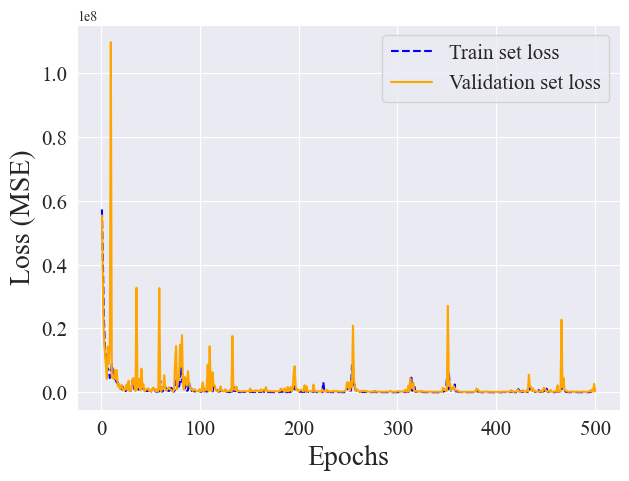

In [16]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss', linestyle='--')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss (MSE)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

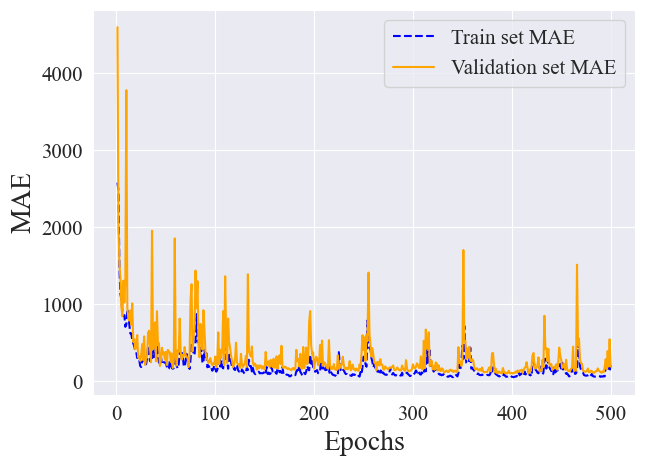

In [17]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE', linestyle='--')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('MAE', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

In [ ]:
print (epochs)

# Part 4 - Make predictions

3/3 [==============================] - 0s 3ms/step


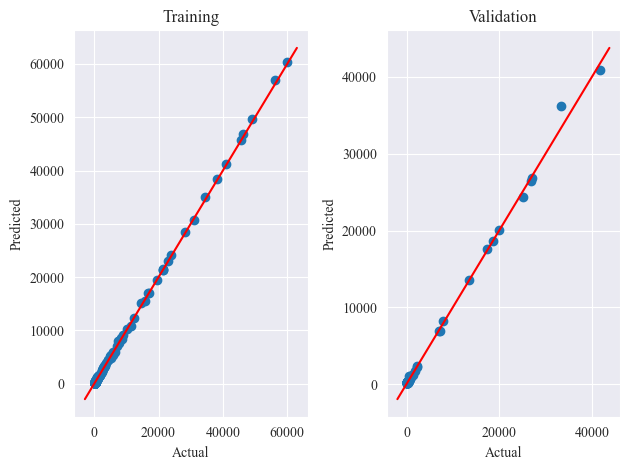

In [18]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [19]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 5ms/step


Text(0, 0.5, 'Predicted data')

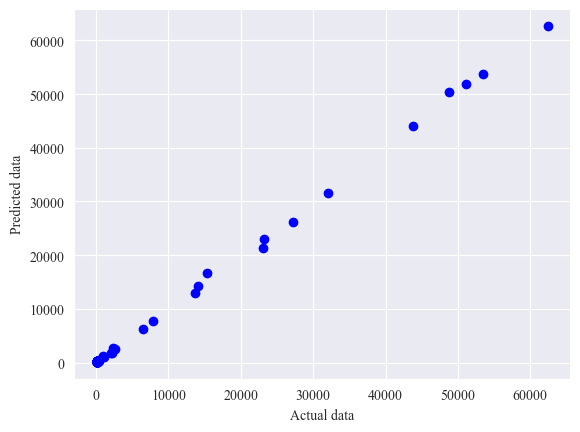

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,60000],[0,60000], color = "red")
#plt.axis ([0,60000,0,60000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

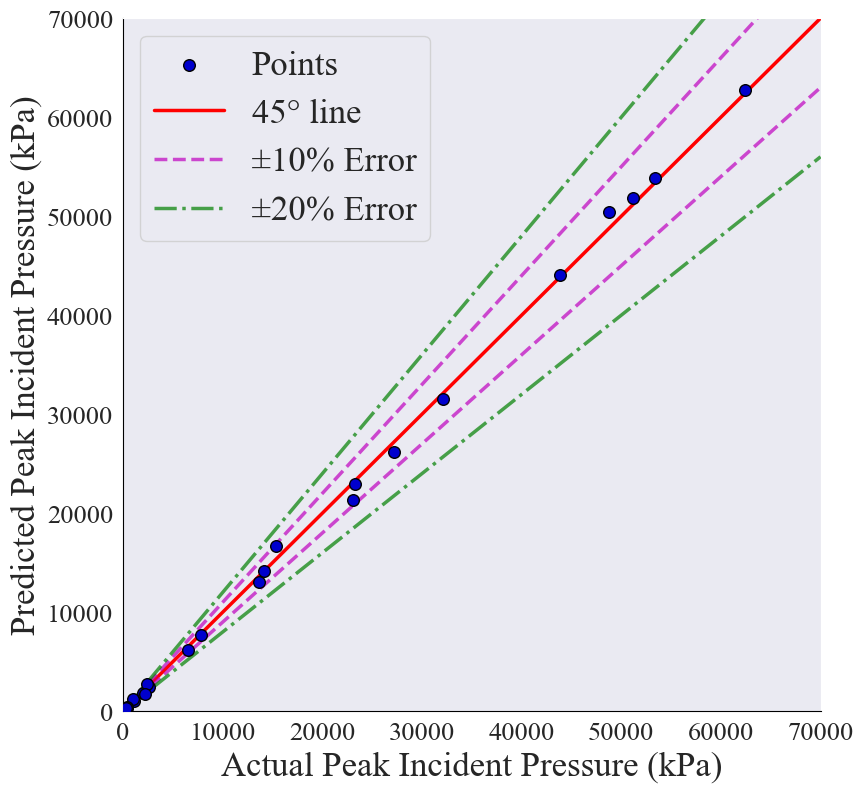

In [31]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,70000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 70000)
plt.xlim(0, 70000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

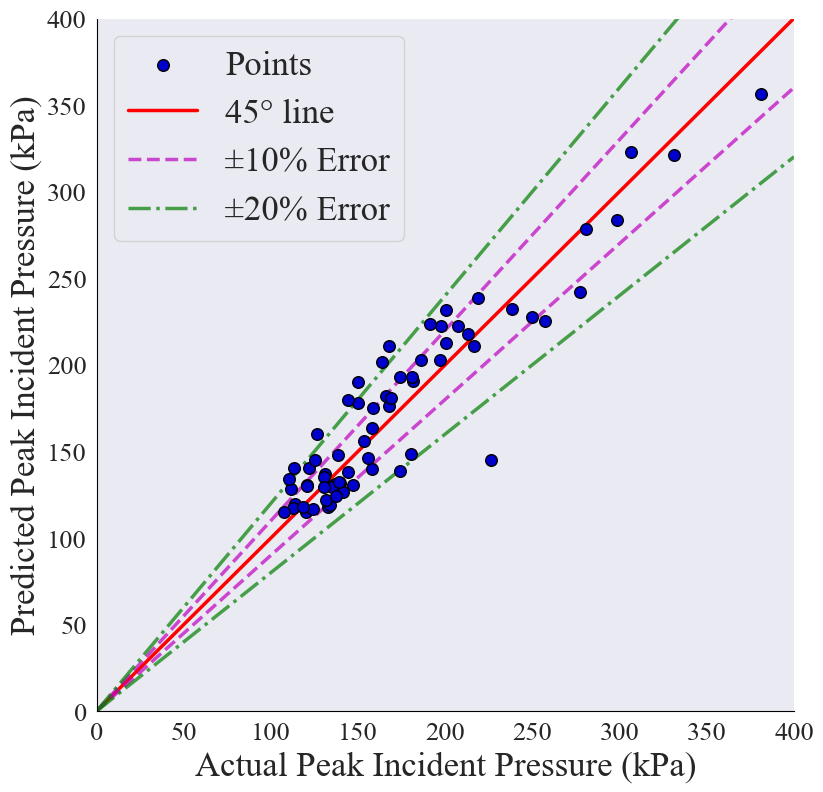

In [22]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,400)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

In [ ]:
df_xtest = pd.DataFrame(X_test)
df_xtest.to_csv("xtest_file.csv")

In [23]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 2ms/step
48.638770242090104
130.81277413200598


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9993098117662591


In [25]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9997932242586256


In [26]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 67.42%
Within 20% margin 88.76%
Out of 20% margin 11.24%


In [27]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9992769456598904


In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

341.38458910893337

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

130.81277413200598

In [30]:
ann.save('Peak_Reflected_Pressure_ANN_1_nodrop_noscale.h5')

D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load saved model

In [40]:
ann = load_model('Peak_Reflected_Pressure_ANN_1_nodrop_noscale.h5')

## SHAP

In [41]:
dataset = pd.read_excel('RPDataset1.xlsx')
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
y = dataset[('Peak reflected pressure(kPa)')]
X = dataset.drop('Peak reflected pressure(kPa)', axis=1)
print (X)

     Explosive mass(kg)  Standoff distance(m)  Explosive type_Composition B  \
0                   0.5                   1.5                             1   
1                   0.5                  10.5                             1   
2                   0.5                  11.5                             1   
3                   0.5                  12.5                             1   
4                   0.5                  13.5                             1   
..                  ...                   ...                           ...   
583                25.0                   5.5                             0   
584                25.0                   6.5                             0   
585                25.0                   7.5                             0   
586                25.0                   8.5                             0   
587                25.0                   9.5                             0   

     Explosive type_TNT  
0                     0  

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=71)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=71)

In [51]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

13/13 [==============================] - 0s 2ms/step


  0%|          | 0/411 [00:00<?, ?it/s]

180/180 [==============================] - 0s 2ms/step


In [68]:
explainer2 = shap.Explainer(ann.predict, X_train)
shap_values2 = explainer2(X_train)

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:   9%|▉         | 38/411 [00:00<?, ?it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 40/411 [00:10<00:57,  6.51it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  10%|▉         | 41/411 [00:10<01:15,  4.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|█         | 42/411 [00:11<01:22,  4.45it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|█         | 43/411 [00:11<01:26,  4.23it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  11%|█         | 44/411 [00:11<01:33,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  11%|█         | 45/411 [00:11<01:31,  3.99it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  11%|█         | 46/411 [00:12<01:30,  4.03it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  11%|█▏        | 47/411 [00:12<01:32,  3.95it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  12%|█▏        | 48/411 [00:12<01:30,  4.01it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  12%|█▏        | 49/411 [00:12<01:32,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 50/411 [00:13<01:37,  3.70it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 51/411 [00:13<01:42,  3.51it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 52/411 [00:13<01:39,  3.60it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 53/411 [00:14<01:42,  3.50it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 54/411 [00:14<01:44,  3.42it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 55/411 [00:14<01:41,  3.50it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▎        | 56/411 [00:14<01:44,  3.41it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 57/411 [00:15<01:42,  3.47it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  14%|█▍        | 58/411 [00:15<01:38,  3.58it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  14%|█▍        | 59/411 [00:15<01:37,  3.60it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▍        | 60/411 [00:16<01:35,  3.69it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 61/411 [00:16<01:34,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▌        | 62/411 [00:16<01:34,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▌        | 63/411 [00:16<01:33,  3.71it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 64/411 [00:17<01:35,  3.62it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 65/411 [00:17<01:38,  3.51it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  16%|█▌        | 66/411 [00:17<01:34,  3.65it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▋        | 67/411 [00:17<01:33,  3.68it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  17%|█▋        | 68/411 [00:18<01:33,  3.68it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 69/411 [00:18<01:32,  3.70it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 70/411 [00:18<01:29,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  17%|█▋        | 71/411 [00:18<01:29,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 72/411 [00:19<01:29,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 73/411 [00:19<01:27,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 74/411 [00:19<01:26,  3.89it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 75/411 [00:19<01:26,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 76/411 [00:20<01:24,  3.95it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▊        | 77/411 [00:20<01:23,  3.98it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▉        | 78/411 [00:20<01:28,  3.76it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▉        | 79/411 [00:21<01:25,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  19%|█▉        | 80/411 [00:21<01:24,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 81/411 [00:21<01:25,  3.84it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 82/411 [00:21<01:29,  3.68it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  20%|██        | 83/411 [00:22<01:27,  3.73it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|██        | 84/411 [00:22<01:32,  3.53it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 85/411 [00:22<01:33,  3.49it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 86/411 [00:22<01:31,  3.55it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 87/411 [00:23<01:31,  3.53it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  21%|██▏       | 88/411 [00:23<01:29,  3.60it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 89/411 [00:23<01:26,  3.72it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 90/411 [00:24<01:27,  3.65it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 91/411 [00:24<01:26,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 92/411 [00:24<01:27,  3.66it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 93/411 [00:24<01:25,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 94/411 [00:25<01:23,  3.78it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 95/411 [00:25<01:24,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 96/411 [00:25<01:23,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  24%|██▎       | 97/411 [00:25<01:23,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  24%|██▍       | 98/411 [00:26<01:20,  3.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▍       | 99/411 [00:26<01:19,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  24%|██▍       | 100/411 [00:26<01:18,  3.96it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  25%|██▍       | 101/411 [00:26<01:18,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 102/411 [00:27<01:22,  3.74it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  25%|██▌       | 103/411 [00:27<01:22,  3.74it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  25%|██▌       | 104/411 [00:27<01:21,  3.76it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 105/411 [00:28<01:21,  3.76it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 106/411 [00:28<01:21,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 107/411 [00:28<01:19,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▋       | 108/411 [00:28<01:20,  3.77it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 109/411 [00:29<01:21,  3.70it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 110/411 [00:29<01:21,  3.71it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 111/411 [00:29<01:20,  3.72it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 112/411 [00:29<01:22,  3.63it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 113/411 [00:30<01:19,  3.76it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  28%|██▊       | 114/411 [00:30<01:18,  3.79it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 115/411 [00:30<01:20,  3.66it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 116/411 [00:30<01:20,  3.68it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  28%|██▊       | 117/411 [00:31<01:21,  3.60it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▊       | 118/411 [00:31<01:18,  3.74it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 119/411 [00:31<01:21,  3.58it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 120/411 [00:32<01:23,  3.49it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 121/411 [00:32<01:22,  3.51it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|██▉       | 122/411 [00:32<01:21,  3.53it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|██▉       | 123/411 [00:32<01:18,  3.65it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|███       | 124/411 [00:33<01:18,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|███       | 125/411 [00:33<01:17,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  31%|███       | 126/411 [00:33<01:17,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  31%|███       | 127/411 [00:34<01:15,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  31%|███       | 128/411 [00:34<01:13,  3.86it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███▏      | 129/411 [00:34<01:12,  3.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 130/411 [00:34<01:14,  3.80it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 131/411 [00:35<01:12,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 132/411 [00:35<01:13,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 133/411 [00:35<01:14,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 134/411 [00:35<01:14,  3.74it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 135/411 [00:36<01:15,  3.65it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 136/411 [00:36<01:14,  3.69it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 137/411 [00:36<01:14,  3.66it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▎      | 138/411 [00:36<01:13,  3.71it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 139/411 [00:37<01:12,  3.76it/s]

15/15 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 140/411 [00:37<01:12,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 141/411 [00:37<01:13,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▍      | 142/411 [00:38<01:12,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▍      | 143/411 [00:38<01:16,  3.48it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▌      | 144/411 [00:38<01:13,  3.63it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 145/411 [00:38<01:11,  3.73it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 146/411 [00:39<01:10,  3.73it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 147/411 [00:39<01:09,  3.78it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 148/411 [00:39<01:10,  3.71it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▋      | 149/411 [00:39<01:11,  3.66it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  36%|███▋      | 150/411 [00:40<01:08,  3.81it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  37%|███▋      | 151/411 [00:40<01:10,  3.67it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 152/411 [00:40<01:10,  3.65it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 153/411 [00:41<01:09,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 154/411 [00:41<01:07,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 155/411 [00:41<01:06,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 156/411 [00:41<01:05,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 157/411 [00:42<01:04,  3.91it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  38%|███▊      | 158/411 [00:42<01:04,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 159/411 [00:42<01:06,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 160/411 [00:42<01:03,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 161/411 [00:43<01:02,  3.98it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 162/411 [00:43<01:04,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|███▉      | 163/411 [00:43<01:05,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|███▉      | 164/411 [00:43<01:03,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|████      | 165/411 [00:44<01:02,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  40%|████      | 166/411 [00:44<01:03,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████      | 167/411 [00:44<01:04,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████      | 168/411 [00:44<01:02,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████      | 169/411 [00:45<01:02,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████▏     | 170/411 [00:45<01:01,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  42%|████▏     | 171/411 [00:45<01:03,  3.79it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 172/411 [00:45<01:02,  3.81it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  42%|████▏     | 173/411 [00:46<01:04,  3.69it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 174/411 [00:46<01:04,  3.66it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 175/411 [00:46<01:06,  3.57it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 176/411 [00:47<01:06,  3.55it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 177/411 [00:47<01:03,  3.71it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 178/411 [00:47<01:02,  3.75it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 179/411 [00:47<01:01,  3.76it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 180/411 [00:48<01:00,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  44%|████▍     | 181/411 [00:48<01:00,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  44%|████▍     | 182/411 [00:48<00:59,  3.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 183/411 [00:48<00:58,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▍     | 184/411 [00:49<00:57,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▌     | 185/411 [00:49<00:56,  3.98it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 186/411 [00:49<00:57,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▌     | 187/411 [00:49<00:57,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 188/411 [00:50<00:56,  3.97it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  46%|████▌     | 189/411 [00:50<00:56,  3.91it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  46%|████▌     | 190/411 [00:50<00:57,  3.86it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▋     | 191/411 [00:50<00:55,  3.93it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 192/411 [00:51<00:57,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 193/411 [00:51<00:57,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 194/411 [00:51<00:55,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 195/411 [00:51<00:54,  3.96it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 196/411 [00:52<00:57,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 197/411 [00:52<00:56,  3.79it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 198/411 [00:52<00:59,  3.56it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 199/411 [00:53<00:58,  3.62it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▊     | 200/411 [00:53<00:56,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 201/411 [00:53<00:55,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 202/411 [00:53<00:54,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 203/411 [00:54<00:53,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|████▉     | 204/411 [00:54<00:52,  3.98it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 205/411 [00:54<00:52,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|█████     | 206/411 [00:54<00:51,  3.96it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 207/411 [00:55<00:52,  3.86it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  51%|█████     | 208/411 [00:55<00:56,  3.59it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 209/411 [00:55<00:54,  3.67it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 210/411 [00:55<00:56,  3.57it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████▏    | 211/411 [00:56<00:57,  3.46it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 212/411 [00:56<00:55,  3.61it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  52%|█████▏    | 213/411 [00:56<00:53,  3.67it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 214/411 [00:57<00:53,  3.71it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 215/411 [00:57<00:54,  3.58it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 216/411 [00:57<00:52,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 217/411 [00:57<00:51,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 218/411 [00:58<00:50,  3.83it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 219/411 [00:58<00:52,  3.66it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▎    | 220/411 [00:58<00:51,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 221/411 [00:58<00:50,  3.77it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 222/411 [00:59<00:49,  3.84it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 223/411 [00:59<00:49,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▍    | 224/411 [00:59<00:49,  3.74it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 225/411 [00:59<00:49,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▍    | 226/411 [01:00<00:47,  3.90it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▌    | 227/411 [01:00<00:46,  3.96it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 228/411 [01:00<00:45,  4.02it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 229/411 [01:00<00:48,  3.76it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 230/411 [01:01<00:48,  3.75it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 231/411 [01:01<00:49,  3.64it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▋    | 232/411 [01:01<00:50,  3.57it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  57%|█████▋    | 233/411 [01:02<00:49,  3.57it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  57%|█████▋    | 234/411 [01:02<00:47,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  57%|█████▋    | 235/411 [01:02<00:46,  3.83it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 236/411 [01:02<00:45,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 237/411 [01:03<00:44,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 238/411 [01:03<00:43,  3.96it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 239/411 [01:03<00:45,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 240/411 [01:03<00:45,  3.76it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  59%|█████▊    | 241/411 [01:04<00:44,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  59%|█████▉    | 242/411 [01:04<00:43,  3.87it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 243/411 [01:04<00:43,  3.83it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 244/411 [01:04<00:45,  3.64it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  60%|█████▉    | 245/411 [01:05<00:44,  3.76it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 246/411 [01:05<00:42,  3.85it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 247/411 [01:05<00:43,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  60%|██████    | 248/411 [01:06<00:42,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 249/411 [01:06<00:42,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 250/411 [01:06<00:41,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 251/411 [01:06<00:40,  3.90it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████▏   | 252/411 [01:07<00:40,  3.91it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 253/411 [01:07<01:01,  2.57it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 254/411 [01:07<00:54,  2.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 255/411 [01:08<00:52,  2.98it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  62%|██████▏   | 256/411 [01:08<00:49,  3.12it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 257/411 [01:08<00:46,  3.33it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 258/411 [01:09<00:45,  3.37it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 259/411 [01:09<00:42,  3.57it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 260/411 [01:09<00:41,  3.60it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▎   | 261/411 [01:09<00:42,  3.49it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  64%|██████▎   | 262/411 [01:10<00:42,  3.49it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 263/411 [01:10<00:41,  3.54it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  64%|██████▍   | 264/411 [01:10<00:40,  3.61it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 265/411 [01:11<00:39,  3.72it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  65%|██████▍   | 266/411 [01:11<00:40,  3.60it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▍   | 267/411 [01:11<00:38,  3.75it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 268/411 [01:11<00:38,  3.68it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▌   | 269/411 [01:12<00:37,  3.81it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  66%|██████▌   | 270/411 [01:12<00:38,  3.65it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  66%|██████▌   | 271/411 [01:12<00:38,  3.62it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 272/411 [01:12<00:37,  3.66it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▋   | 273/411 [01:13<00:36,  3.74it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 274/411 [01:13<00:36,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 275/411 [01:13<00:35,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 276/411 [01:13<00:34,  3.96it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  67%|██████▋   | 277/411 [01:14<00:35,  3.77it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 278/411 [01:14<00:34,  3.81it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 279/411 [01:14<00:35,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 280/411 [01:15<00:35,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 281/411 [01:15<00:34,  3.76it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▊   | 282/411 [01:15<00:33,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▉   | 283/411 [01:15<00:32,  3.92it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 284/411 [01:16<00:31,  3.98it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 285/411 [01:16<00:31,  3.98it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 286/411 [01:16<00:31,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 287/411 [01:16<00:32,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 288/411 [01:17<00:31,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 289/411 [01:17<00:30,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 290/411 [01:17<00:29,  4.03it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 291/411 [01:17<00:30,  3.90it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 292/411 [01:18<00:30,  3.84it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████▏  | 293/411 [01:18<00:31,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  72%|███████▏  | 294/411 [01:18<00:30,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  72%|███████▏  | 295/411 [01:18<00:29,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  72%|███████▏  | 296/411 [01:19<00:29,  3.95it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 297/411 [01:19<00:30,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 298/411 [01:19<00:30,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 299/411 [01:19<00:29,  3.74it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 300/411 [01:20<00:28,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 301/411 [01:20<00:29,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 302/411 [01:20<00:28,  3.82it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  74%|███████▎  | 303/411 [01:20<00:29,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 304/411 [01:21<00:29,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 305/411 [01:21<00:28,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 306/411 [01:21<00:28,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▍  | 307/411 [01:22<00:27,  3.79it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▍  | 308/411 [01:22<00:26,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▌  | 309/411 [01:22<00:26,  3.90it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▌  | 310/411 [01:22<00:26,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  76%|███████▌  | 311/411 [01:23<00:26,  3.83it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  76%|███████▌  | 312/411 [01:23<00:25,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  76%|███████▌  | 313/411 [01:23<00:25,  3.91it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▋  | 314/411 [01:23<00:25,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 315/411 [01:24<00:25,  3.80it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 316/411 [01:24<00:25,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 317/411 [01:24<00:24,  3.83it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 318/411 [01:24<00:24,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 319/411 [01:25<00:23,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 320/411 [01:25<00:23,  3.94it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 321/411 [01:25<00:22,  4.03it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 322/411 [01:25<00:22,  4.04it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▊  | 323/411 [01:26<00:22,  3.91it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▉  | 324/411 [01:26<00:22,  3.95it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▉  | 325/411 [01:26<00:21,  3.96it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 326/411 [01:26<00:22,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|███████▉  | 327/411 [01:27<00:21,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|███████▉  | 328/411 [01:27<00:21,  3.93it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|████████  | 329/411 [01:27<00:20,  4.01it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|████████  | 330/411 [01:27<00:20,  4.00it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 331/411 [01:28<00:20,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 332/411 [01:28<00:20,  3.83it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 333/411 [01:28<00:20,  3.78it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████▏ | 334/411 [01:29<00:20,  3.67it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 335/411 [01:29<00:20,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 336/411 [01:29<00:19,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 337/411 [01:29<00:19,  3.84it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 338/411 [01:30<00:18,  3.85it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 339/411 [01:30<00:18,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 340/411 [01:30<00:18,  3.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 341/411 [01:30<00:18,  3.88it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 342/411 [01:31<00:17,  3.89it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 343/411 [01:31<00:17,  3.84it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▎ | 344/411 [01:31<00:17,  3.81it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 345/411 [01:31<00:17,  3.79it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 346/411 [01:32<00:17,  3.66it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 347/411 [01:32<00:16,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▍ | 348/411 [01:32<00:16,  3.84it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▍ | 349/411 [01:32<00:16,  3.81it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▌ | 350/411 [01:33<00:17,  3.58it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▌ | 351/411 [01:33<00:16,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  86%|████████▌ | 352/411 [01:33<00:15,  3.80it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 353/411 [01:34<00:15,  3.63it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  86%|████████▌ | 354/411 [01:34<00:15,  3.71it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▋ | 355/411 [01:34<00:16,  3.46it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 356/411 [01:34<00:15,  3.54it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 357/411 [01:35<00:15,  3.55it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 358/411 [01:35<00:14,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  87%|████████▋ | 359/411 [01:35<00:14,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  88%|████████▊ | 360/411 [01:35<00:13,  3.76it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 361/411 [01:36<00:13,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  88%|████████▊ | 362/411 [01:36<00:13,  3.71it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  88%|████████▊ | 363/411 [01:36<00:12,  3.80it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▊ | 364/411 [01:37<00:12,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 365/411 [01:37<00:12,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 366/411 [01:37<00:11,  3.84it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 367/411 [01:37<00:11,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  90%|████████▉ | 368/411 [01:38<00:11,  3.64it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 369/411 [01:38<00:11,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  90%|█████████ | 370/411 [01:38<00:10,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  90%|█████████ | 371/411 [01:38<00:10,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 372/411 [01:39<00:10,  3.82it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 373/411 [01:39<00:10,  3.78it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 374/411 [01:39<00:09,  3.72it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 375/411 [01:39<00:09,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████▏| 376/411 [01:40<00:09,  3.79it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  92%|█████████▏| 377/411 [01:40<00:08,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  92%|█████████▏| 378/411 [01:40<00:08,  3.67it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  92%|█████████▏| 379/411 [01:41<00:08,  3.75it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  92%|█████████▏| 380/411 [01:41<00:08,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 381/411 [01:41<00:07,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 382/411 [01:41<00:07,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 383/411 [01:42<00:07,  3.86it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 384/411 [01:42<00:06,  3.90it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▎| 385/411 [01:42<00:06,  3.82it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 386/411 [01:42<00:06,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 387/411 [01:43<00:06,  3.93it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 388/411 [01:43<00:05,  3.98it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▍| 389/411 [01:43<00:05,  3.87it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 390/411 [01:43<00:05,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▌| 391/411 [01:44<00:05,  3.75it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  95%|█████████▌| 392/411 [01:44<00:04,  3.81it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 393/411 [01:44<00:04,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 394/411 [01:44<00:04,  3.86it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 395/411 [01:45<00:04,  3.93it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▋| 396/411 [01:45<00:03,  3.80it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 397/411 [01:45<00:03,  3.92it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 398/411 [01:45<00:03,  3.94it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 399/411 [01:46<00:03,  3.88it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 400/411 [01:46<00:02,  3.73it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 401/411 [01:46<00:02,  3.69it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 402/411 [01:47<00:02,  3.76it/s]

14/14 [==============================] - 0s 3ms/step


ExactExplainer explainer:  98%|█████████▊| 403/411 [01:47<00:02,  3.70it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 404/411 [01:47<00:01,  3.64it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▊| 405/411 [01:47<00:01,  3.78it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▉| 406/411 [01:48<00:01,  3.62it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 407/411 [01:48<00:01,  3.71it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 408/411 [01:48<00:00,  3.71it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|█████████▉| 409/411 [01:48<00:00,  3.77it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|█████████▉| 410/411 [01:49<00:00,  3.87it/s]

14/14 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|██████████| 411/411 [01:49<00:00,  3.92it/s]

14/14 [==============================] - 0s 2ms/step


ExactExplainer explainer: 412it [01:49,  3.41it/s]                         


In [33]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

In [35]:
print (X_train)

[[17.5 13.5  0.   1. ]
 [ 7.5 17.5  0.   1. ]
 [15.5  2.5  0.   1. ]
 ...
 [ 3.5 20.   1.   0. ]
 [ 0.5  1.   1.   0. ]
 [ 9.5 11.5  1.   0. ]]


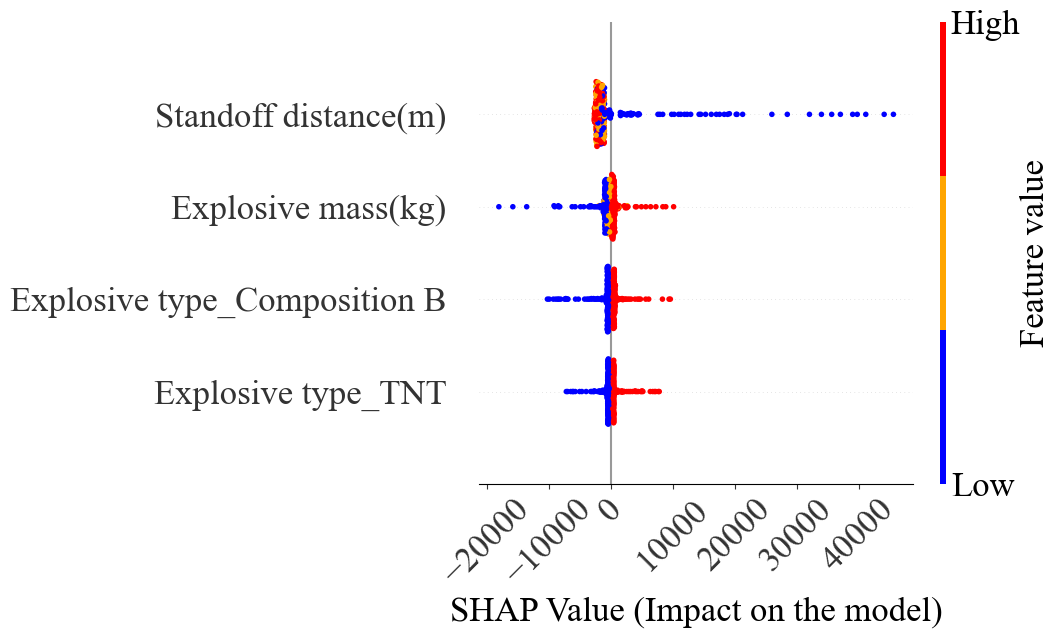

In [108]:
features = ['Explosive mass', 'Standoff distance', 'Explosive type-CompB', 'Explosive type-TNT' ]
shap.plots.beeswarm(shap_values2, color =cmap, order=shap_values2.abs.max(0), show = False)
fig = plt.gcf()

plt.rcParams.update(plt.rcParamsDefault)
#plt.figure(facecolor='white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
#plt.rcParams['figure.facecolor'] = 'white'

fig.set_size_inches(7,6)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)

# Get colorbar
cb_ax = fig.axes[1]


# Modifying color bar parameters
cb_ax.tick_params(labelsize=25)
cb_ax.set_ylabel("Feature value", fontsize=25)
plt.savefig('SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()
#feature_names=features

In [95]:
#Waterfall Plot (for an instance)
explainer3 = shap.Explainer(ann.predict, X_test)
#X_test.columns=features
shap_values3 = explainer3(X_test)

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 38/89 [00:00<?, ?it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▍     | 40/89 [00:10<00:05,  8.66it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 41/89 [00:10<00:08,  5.77it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  47%|████▋     | 42/89 [00:10<00:09,  5.19it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  48%|████▊     | 43/89 [00:10<00:09,  4.99it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  49%|████▉     | 44/89 [00:11<00:09,  4.81it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 45/89 [00:11<00:09,  4.75it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  52%|█████▏    | 46/89 [00:11<00:09,  4.69it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 47/89 [00:11<00:09,  4.59it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 48/89 [00:12<00:08,  4.58it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▌    | 49/89 [00:12<00:08,  4.55it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▌    | 50/89 [00:12<00:08,  4.59it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  57%|█████▋    | 51/89 [00:12<00:08,  4.63it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 52/89 [00:12<00:08,  4.42it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  60%|█████▉    | 53/89 [00:13<00:08,  4.29it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 54/89 [00:13<00:08,  4.24it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 55/89 [00:13<00:08,  4.03it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 56/89 [00:13<00:08,  4.05it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  64%|██████▍   | 57/89 [00:14<00:07,  4.12it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▌   | 58/89 [00:14<00:07,  4.03it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▋   | 59/89 [00:14<00:07,  3.96it/s]

12/12 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 60/89 [00:14<00:07,  4.03it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▊   | 61/89 [00:15<00:06,  4.02it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 62/89 [00:15<00:06,  4.07it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████   | 63/89 [00:15<00:06,  4.04it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 64/89 [00:15<00:06,  3.90it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  73%|███████▎  | 65/89 [00:16<00:06,  3.86it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 66/89 [00:16<00:06,  3.83it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 67/89 [00:16<00:05,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▋  | 68/89 [00:17<00:05,  3.74it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  78%|███████▊  | 69/89 [00:17<00:05,  3.72it/s]

12/12 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▊  | 70/89 [00:17<00:04,  3.93it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 71/89 [00:17<00:04,  3.95it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  81%|████████  | 72/89 [00:18<00:04,  3.94it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  82%|████████▏ | 73/89 [00:18<00:04,  3.96it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 74/89 [00:18<00:03,  3.93it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 75/89 [00:18<00:03,  4.02it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▌ | 76/89 [00:19<00:03,  3.98it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 77/89 [00:19<00:03,  3.85it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 78/89 [00:19<00:02,  3.91it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 79/89 [00:19<00:02,  3.95it/s]

13/13 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 80/89 [00:20<00:02,  3.79it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 81/89 [00:20<00:02,  3.89it/s]

12/12 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 82/89 [00:20<00:01,  3.98it/s]

12/12 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 83/89 [00:20<00:01,  3.86it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  94%|█████████▍| 84/89 [00:21<00:01,  3.88it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 85/89 [00:21<00:00,  4.00it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  97%|█████████▋| 86/89 [00:21<00:00,  4.08it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer:  98%|█████████▊| 87/89 [00:21<00:00,  4.13it/s]

12/12 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▉| 88/89 [00:22<00:00,  4.11it/s]

13/13 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|██████████| 89/89 [00:22<00:00,  4.07it/s]

13/13 [==============================] - 0s 3ms/step


ExactExplainer explainer: 90it [00:22,  2.30it/s]                        


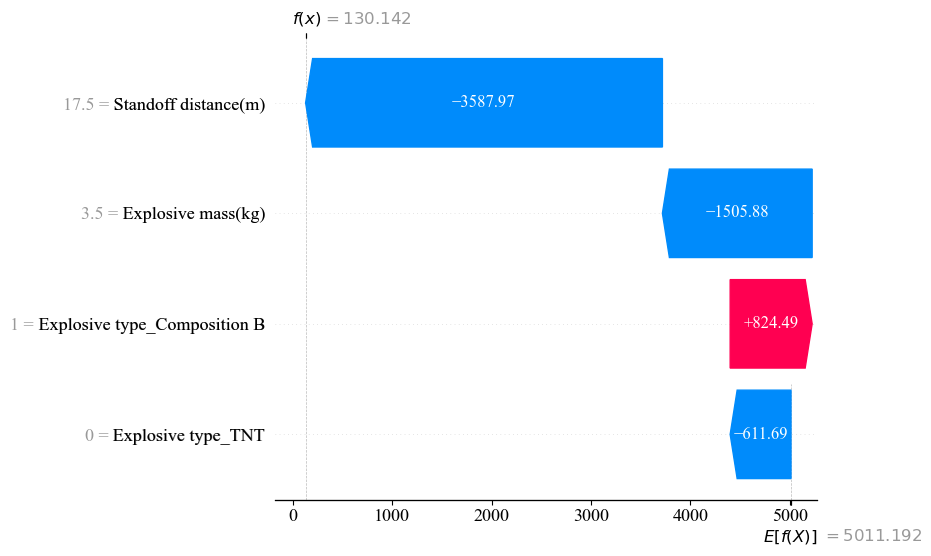

In [121]:
shap.waterfall_plot(shap_values3[56], show=False)
#fig2, ax2 = plt.subplots()
plt.gcf()
plt.gcf().set_size_inches(7, 6)
plt.rc('font', size=40)
plt.rcParams['font.weight'] = 'normal'

#plt.xlabel('SHAP Value', fontsize = 25)

#ax2.set_xlabel('SHAP Value', fontsize = 25)
#ax2.xaxis.set_label_coords(0.5, 0.1)
plt.savefig('SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

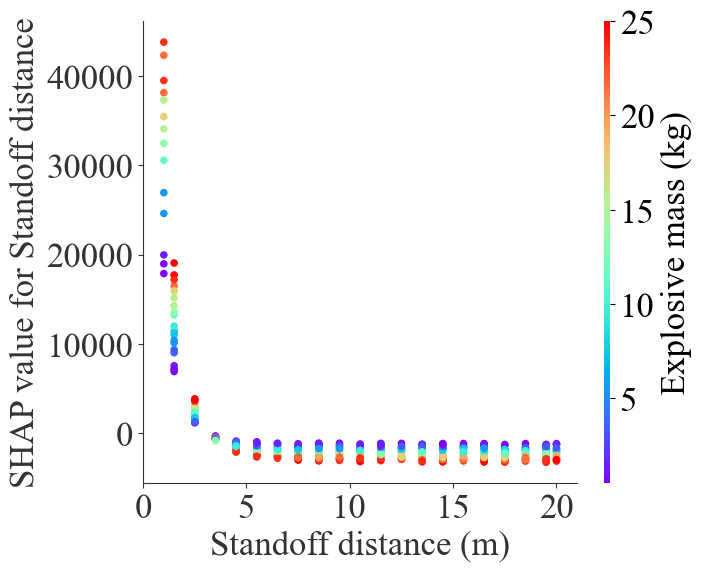

In [122]:
#Partial Dependenace Plot
shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig3 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Standoff distance", fontsize = 25)
plt.xlabel("Standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
plt.xlim (0, 21)
#plt.ylim (-1000, 6000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=25)
cb_ax3.set_ylabel("Explosive mass (kg)", fontsize=25)
plt.savefig('SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

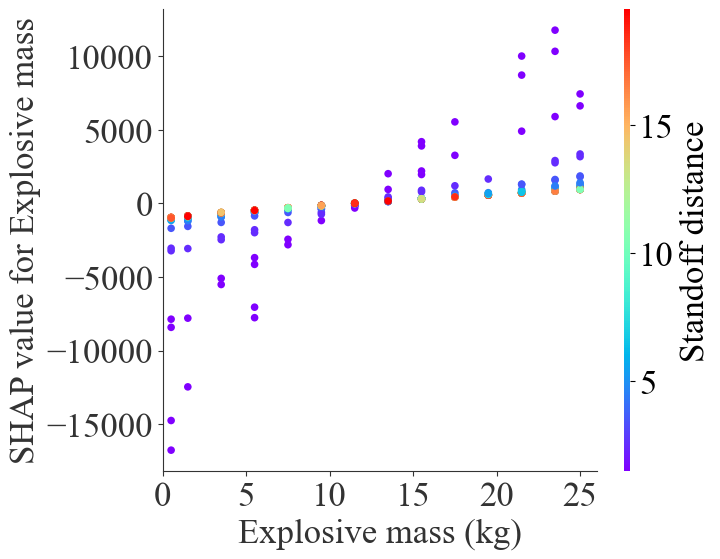

In [123]:
#Partial Dependenace Plot
shap.dependence_plot(0, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig4 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax4 = fig4.axes[1] 

# Modifying color bar parameters
cb_ax4.tick_params(labelsize=25)
cb_ax4.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

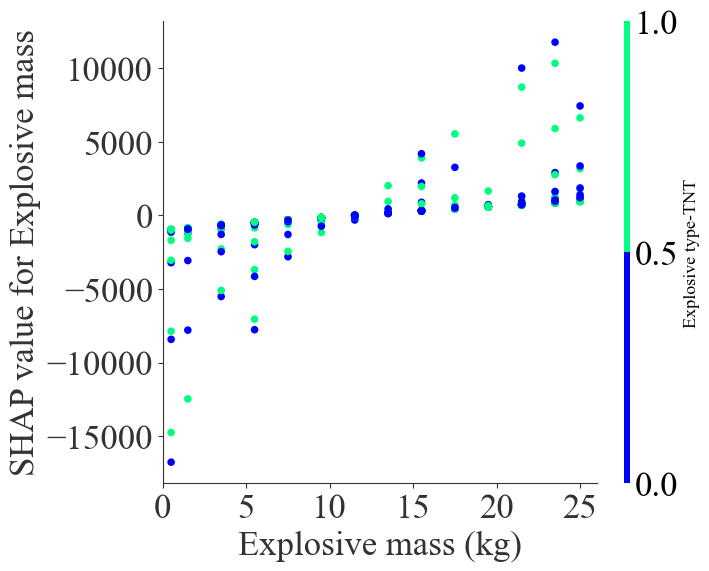

In [124]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Explosive mass',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Explosive type-TNT',
                     show=False, cmap=plt.get_cmap("winter"), dot_size = 30)
fig5 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax5 = fig5.axes[1] 

# Modifying color bar parameters
cb_ax5.tick_params(labelsize=25)
#cb_ax5.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()